In [33]:
import torch
import torchvision
import torchvision.transforms as transforms

In [34]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

60000
torch.Size([1, 28, 28]) 5


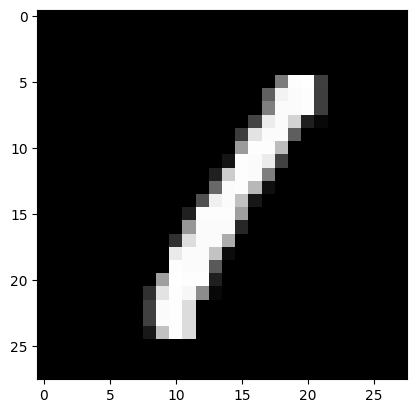

In [35]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[3][0][0], cmap='gray')

In [36]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

In [37]:
testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [38]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [49]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x


model = Model(28 * 28 * 1, 1024)

In [50]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

In [51]:
import numpy as np

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

In [52]:
n_epochs = 100
loss_fn = nn.CrossEntropyLoss()

train_accs = []
test_accs = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_accs.append(accuracy(model, trainloader))
  test_accs.append(accuracy(model, testloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 2142.5222203731537
Epoch   1 | Loss: 2094.8048491477966
Epoch   2 | Loss: 2026.4908564090729
Epoch   3 | Loss: 1919.414154291153
Epoch   4 | Loss: 1756.1994313001633
Epoch   5 | Loss: 1558.580608844757
Epoch   6 | Loss: 1374.7850736379623
Epoch   7 | Loss: 1232.2523754239082
Epoch   8 | Loss: 1126.4831728935242
Epoch   9 | Loss: 1045.4902089834213
Epoch  10 | Loss: 982.6855745315552
Epoch  11 | Loss: 932.6094253063202
Epoch  12 | Loss: 892.9025129079819
Epoch  13 | Loss: 860.7514266371727
Epoch  14 | Loss: 834.0390312373638
Epoch  15 | Loss: 812.0770042538643
Epoch  16 | Loss: 793.7151336669922
Epoch  17 | Loss: 778.127347111702
Epoch  18 | Loss: 764.6244969666004
Epoch  19 | Loss: 753.3681767582893
Epoch  20 | Loss: 743.2402383387089
Epoch  21 | Loss: 734.328860938549
Epoch  22 | Loss: 726.4639903306961
Epoch  23 | Loss: 719.443342268467
Epoch  24 | Loss: 713.1703233718872
Epoch  25 | Loss: 707.3442175090313
Epoch  26 | Loss: 702.1256403625011
Epoch  27 | Loss: 697.5

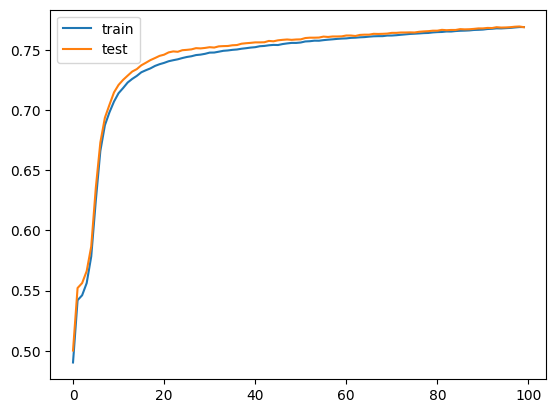

In [53]:
plot_acc(train_accs, test_accs)